In [20]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as sts
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')

In [21]:
a = 3
b = 2
m_tup = (10, 20, 50)
sigm_tup = (1, a/9)

In [22]:
def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def R_square(y_true, y_predict):
    error = 1 - ((np.sum(np.power(y_true - y_predict, 2))) / np.sum(np.power(y_true - np.mean(y_true), 2)))
    return error

MSE Tale: 0.5097014882898127
R^2 Tale: 0.6076524176879763
b_est(Tale) = 1.646683523094738
a_est(Tale) = 3.303180666137167


MSE Squares: 0.5032049426225471
R^2 Squares: 0.6126531956815496
b_est(Square) = 1.7927623487987294
a_est(Square) = 3.106009915206051


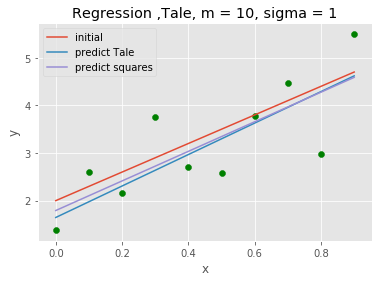

MSE Tale: 0.10232166590792247
R^2 Tale: 0.8887994081152012
b_est(Tale) = 1.775768385922257
a_est(Tale) = 3.3288123203086184


MSE Squares: 0.09827935892249887
R^2 Squares: 0.8931924848440697
b_est(Square) = 1.8135754155157955
a_est(Square) = 3.156282065683456


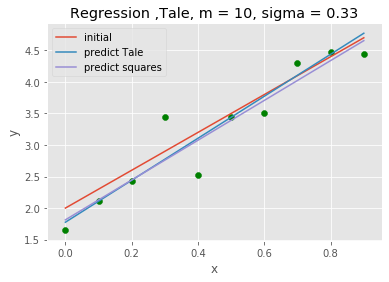

MSE Tale: 0.7354882850094213
R^2 Tale: 0.5011327695079961
b_est(Tale) = 1.5879505237322917
a_est(Tale) = 3.2106000473068868


MSE Squares: 0.7243463731166213
R^2 Squares: 0.5086901090899254
b_est(Square) = 1.7733121621879173
a_est(Square) = 3.0036976087800795


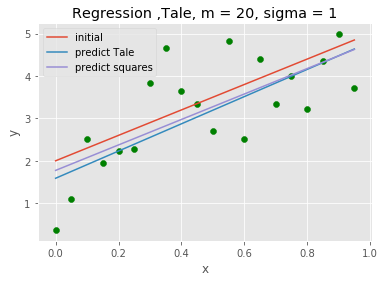

MSE Tale: 0.17172204037819044
R^2 Tale: 0.8017618804512474
b_est(Tale) = 2.0010630569559678
a_est(Tale) = 2.9041987099447164


MSE Squares: 0.1663408200775023
R^2 Squares: 0.8079740299862552
b_est(Square) = 2.075603847206762
a_est(Square) = 2.9016986461193897


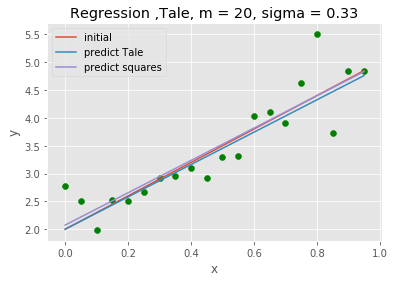

MSE Tale: 1.196526835118258
R^2 Tale: 0.4600397018800667
b_est(Tale) = 1.3320435947174287
a_est(Tale) = 3.412551599075144


MSE Squares: 1.1942165944686838
R^2 Squares: 0.4610822511930117
b_est(Square) = 1.328589336892256
a_est(Square) = 3.50224891263885


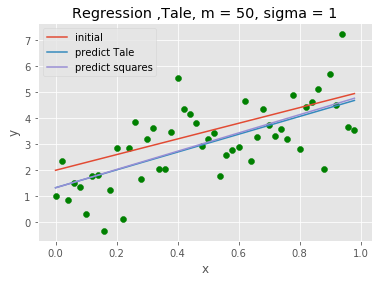

MSE Tale: 0.10783144459106334
R^2 Tale: 0.8862712012329319
b_est(Tale) = 1.8947730344430949
a_est(Tale) = 3.2156866981560386


MSE Squares: 0.10770249896961072
R^2 Squares: 0.8864071989531673
b_est(Square) = 1.914490122029383
a_est(Square) = 3.1763739250605414


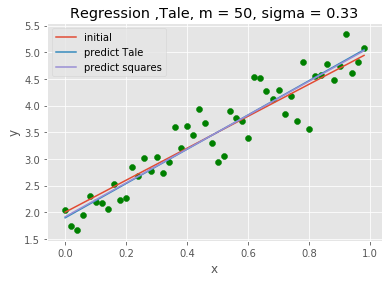

In [29]:
for m in m_tup:
    for sigm in sigm_tup:
        lnr = LinearRegression()
        fig, ax = plt.subplots()
        
        X = np.array([k/m for k in range(0, m)])
        eps = sts.norm.rvs(loc=0, scale=sigm, size=m)
        y = a*X + b + eps
        
        #Облако точек
        ax.scatter(X, y, c='g')
        
        #Исходная прямая 
        ax.plot(X, a*X + b, label='initial')
        
        y_to_x = []
        for i in range(0, m-1):
            for j in range(i+1, m):
                y_to_x.append((y[j] - y[i])/(X[j] - X[i]))
        y_to_x = np.array([y_to_x])
        
        a_esti = np.median(y_to_x)
        b_esti = np.median(y - a_esti*X)
        
        y_pred = a_esti*X + b_esti
        #Mean Square Error Tale
        print('MSE Tale:', MSE(y, y_pred))
        
        #R^2 Tale
        print('R^2 Tale:', R_square(y, y_pred))
        
        ax.plot(X, y_pred, label='predict Tale')
        
        print('b_est(Tale) =', b_esti)
        print('a_est(Tale) =', a_esti)
        print('\n')
        
        #Обучим модель 
        X = np.array([X]).T
        lnr.fit(X, y)
        
        y_pred = lnr.predict(X)
        
        #Mean Square Error
        print('MSE Squares:', MSE(y, y_pred))
        
        #R^2 
        print('R^2 Squares:', lnr.score(X, y))
        
        ax.plot(X, y_pred, label='predict squares')
        
        print('b_est(Square) =', lnr.intercept_)
        print('a_est(Square) =', lnr.coef_[0])
        
        ax.legend()
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title('Regression ,Tale, m = ' + str(m) + ', sigma = ' + str(round(sigm, 2))) 
        plt.show()

<h2> Отклоняется одна точка

MSE Tale: 3.1908564332383724
R^2 Tale: 0.18867371777075603
b_est(Tale) = 1.7646097712368958
a_est(Tale) = 3.199078600773433


MSE Squares: 3.002868022720885
R^2 Squares: 0.23647277780322093
b_est(Square) = 2.124489322424144
a_est(Square) = 3.3575265994703334


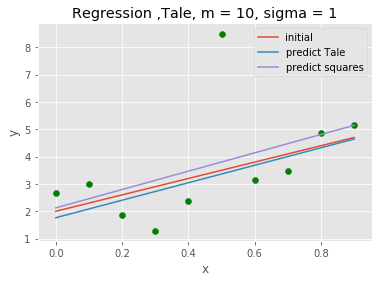

MSE Tale: 0.36849599951935363
R^2 Tale: 0.5512750143543779
b_est(Tale) = 2.1524650029448926
a_est(Tale) = 2.342545294124738


MSE Squares: 0.3256561511369104
R^2 Squares: 0.6034419588410109
b_est(Square) = 2.3083538341299685
a_est(Square) = 2.4508517419326057


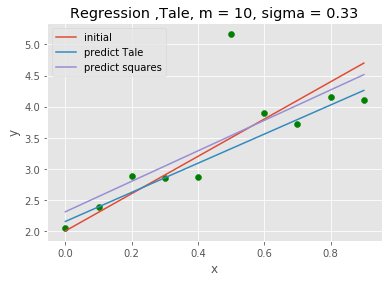

MSE Tale: 1.9086335174322564
R^2 Tale: 0.17394786964437503
b_est(Tale) = 2.3662897949339277
a_est(Tale) = 2.090950339062272


MSE Squares: 1.9051981482790954
R^2 Squares: 0.1754346893934825
b_est(Square) = 2.3584392917433834
a_est(Square) = 2.2082561686766105


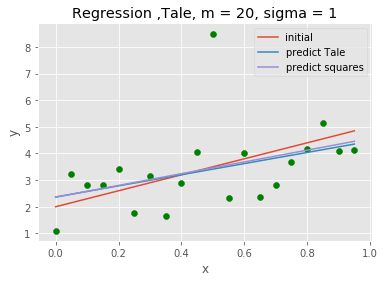

MSE Tale: 0.28323778523620863
R^2 Tale: 0.7416852500958977
b_est(Tale) = 1.8547318084987239
a_est(Tale) = 3.0635394944146017


MSE Squares: 0.2615697897191459
R^2 Squares: 0.7614466065767975
b_est(Square) = 1.948536364037486
a_est(Square) = 3.1692382646559616


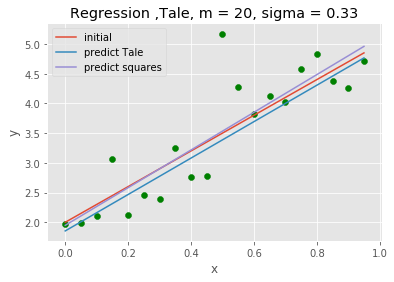

MSE Tale: 1.5671533170586671
R^2 Tale: 0.3091793114713203
b_est(Tale) = 2.090453925558031
a_est(Tale) = 2.8978280335700104


MSE Squares: 1.5671482195062967
R^2 Squares: 0.3091815585358544
b_est(Square) = 2.0904972120934113
a_est(Square) = 2.901732445840292


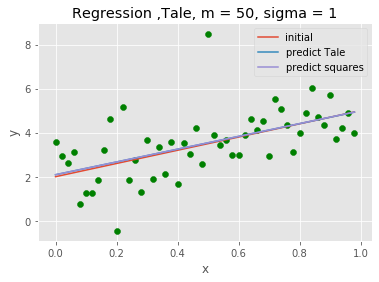

MSE Tale: 0.16383271218084855
R^2 Tale: 0.8391200033462194
b_est(Tale) = 1.9651634098898885
a_est(Tale) = 3.1788473262015895


MSE Squares: 0.16186236000671314
R^2 Squares: 0.841054844361558
b_est(Square) = 1.9952480044806267
a_est(Square) = 3.206556847918597


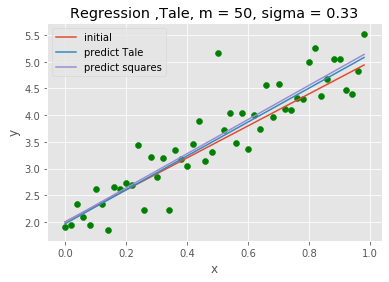

In [30]:
for m in m_tup:
    t = int(m/2) 
    for sigm in sigm_tup:
        lnr = LinearRegression()
        fig, ax = plt.subplots()
        
        X = np.array([k/m for k in range(0, m)])
        eps = sts.norm.rvs(loc=0, scale=sigm, size=m)
        y = a*X + b + eps
        y[t] = a*X[t] + b + 5*sigm
        
        #Облако точек
        ax.scatter(X, y, c='g')
        
        #Исходная прямая 
        ax.plot(X, a*X + b, label='initial')
        
        y_to_x = []
        for i in range(0, m-1):
            for j in range(i+1, m):
                y_to_x.append((y[j] - y[i])/(X[j] - X[i]))
        y_to_x = np.array([y_to_x])
        
        a_esti = np.median(y_to_x)
        b_esti = np.median(y - a_esti*X)
        
        y_pred = a_esti*X + b_esti
        #Mean Square Error Tale
        print('MSE Tale:', MSE(y, y_pred))
        
        #R^2 Tale
        print('R^2 Tale:', R_square(y, y_pred))
        
        ax.plot(X, y_pred, label='predict Tale')
        
        print('b_est(Tale) =', b_esti)
        print('a_est(Tale) =', a_esti)
        print('\n')
        
        #Обучим модель 
        X = np.array([X]).T
        lnr.fit(X, y)
        
        y_pred = lnr.predict(X)
        
        #Mean Square Error
        print('MSE Squares:', MSE(y, y_pred))
        
        #R^2 
        print('R^2 Squares:', lnr.score(X, y))
        
        ax.plot(X, y_pred, label='predict squares')
        
        print('b_est(Square) =', lnr.intercept_)
        print('a_est(Square) =', lnr.coef_[0])
        
        ax.legend()
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title('Regression ,Tale, m = ' + str(m) + ', sigma = ' + str(round(sigm, 2))) 
        plt.show()

<h2> Отклоняются две точки

MSE Tale: 4.72860210620054
R^2 Tale: -0.004029596161313487
b_est(Tale) = 3.0477656080345152
a_est(Tale) = -0.9202701766486595


MSE Squares: 4.643077497273689
R^2 Squares: 0.014129943726824303
b_est(Square) = 3.330176613106658
a_est(Square) = -0.8981241409676873


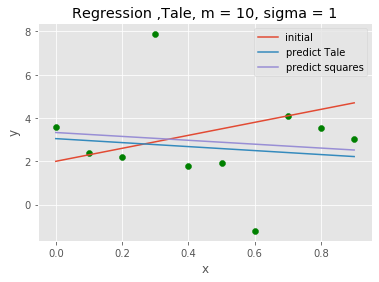

MSE Tale: 0.6618014414227551
R^2 Tale: 0.48058129947019823
b_est(Tale) = 2.0436770700423157
a_est(Tale) = 3.0774680141333004


MSE Squares: 0.6503475450801063
R^2 Squares: 0.48957095646083826
b_est(Square) = 2.1402693805273527
a_est(Square) = 2.749703789562939


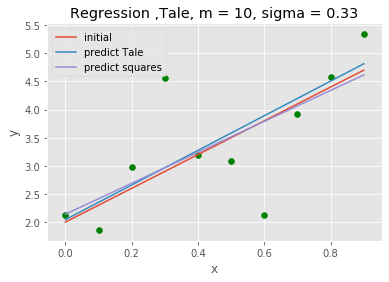

MSE Tale: 3.0010028842410574
R^2 Tale: -0.0056978531095066565
b_est(Tale) = 2.1691498419924384
a_est(Tale) = 1.8533057098940493


MSE Squares: 2.8827747040055263
R^2 Squares: 0.03392284424613323
b_est(Square) = 2.7926877242482453
a_est(Square) = 1.1035188216808403


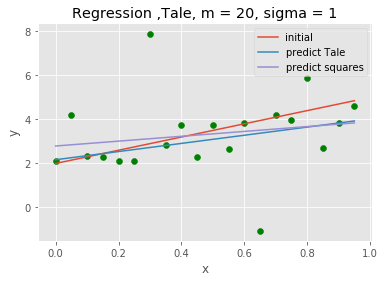

MSE Tale: 0.35180633575458164
R^2 Tale: 0.6212976746169954
b_est(Tale) = 2.008425680072333
a_est(Tale) = 2.8288963603307287


MSE Squares: 0.34384930672146324
R^2 Squares: 0.6298630274595437
b_est(Square) = 2.1653217810443115
a_est(Square) = 2.6531394136146176


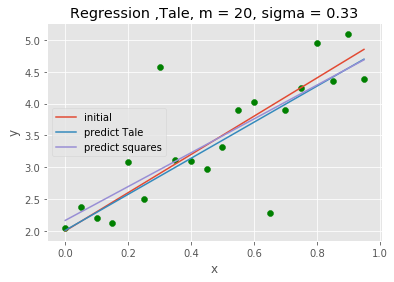

MSE Tale: 1.8479806388293414
R^2 Tale: 0.23445636905191058
b_est(Tale) = 2.0929814295544675
a_est(Tale) = 2.8109046572755427


MSE Squares: 1.8426877370439223
R^2 Squares: 0.23664900417260548
b_est(Square) = 2.2342245903009443
a_est(Square) = 2.618747191338734


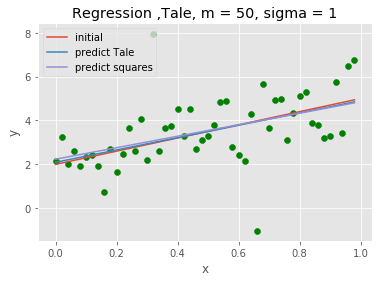

MSE Tale: 0.24159154675465636
R^2 Tale: 0.7209727764884747
b_est(Tale) = 2.009156971008773
a_est(Tale) = 2.88439318101013


MSE Squares: 0.2394938156176791
R^2 Squares: 0.723395560326267
b_est(Square) = 2.0991567208593107
a_est(Square) = 2.7420981589035045


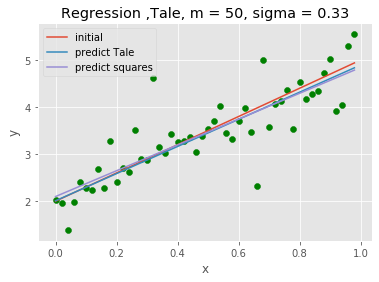

In [31]:
for m in m_tup:
    t = int(m/3) 
    s = int(2*m/3)
    for sigm in sigm_tup:
        lnr = LinearRegression()
        fig, ax = plt.subplots()
        
        X = np.array([k/m for k in range(0, m)])
        eps = sts.norm.rvs(loc=0, scale=sigm, size=m)
        y = a*X + b + eps
        y[t] = a*X[t] + b + 5*sigm
       # y[t+1] = a*X[t+1] + b + 5*sigm
        #y[t-1] = a*X[t-1] + b + 5*sigm
        y[s] = a*X[s] + b - 5*sigm
       # y[s+1] = a*X[s+1] + b - 5*sigm
       # y[s+2] = a*X[s+2] + b - 5*sigm
        #Облако точек
        ax.scatter(X, y, c='g')
        
        #Исходная прямая 
        ax.plot(X, a*X + b, label='initial')
        
        y_to_x = []
        for i in range(0, m-1):
            for j in range(i+1, m):
                y_to_x.append((y[j] - y[i])/(X[j] - X[i]))
        y_to_x = np.array([y_to_x])
        
        a_esti = np.median(y_to_x)
        b_esti = np.median(y - a_esti*X)
        
        y_pred = a_esti*X + b_esti
        #Mean Square Error Tale
        print('MSE Tale:', MSE(y, y_pred))
        
        #R^2 Tale
        print('R^2 Tale:', R_square(y, y_pred))
        
        ax.plot(X, y_pred, label='predict Tale')
        
        print('b_est(Tale) =', b_esti)
        print('a_est(Tale) =', a_esti)
        print('\n')
        
        #Обучим модель 
        X = np.array([X]).T
        lnr.fit(X, y)
        
        y_pred = lnr.predict(X)
        
        #Mean Square Error
        print('MSE Squares:', MSE(y, y_pred))
        
        #R^2 
        print('R^2 Squares:', lnr.score(X, y))
        
        ax.plot(X, y_pred, label='predict squares')
        
        print('b_est(Square) =', lnr.intercept_)
        print('a_est(Square) =', lnr.coef_[0])
        
        ax.legend()
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title('Regression ,Tale, m = ' + str(m) + ', sigma = ' + str(round(sigm, 2))) 
        plt.show()